In [1]:
from pyspark import SparkContext,SparkConf
from pyspark.sql import SparkSession
import pandas as pd

In [2]:
df = spark.read.csv('/data/ccFraud.csv',header=True,inferSchema=True)

In [3]:
df.show(5)

+------+------+-----+----------+-------+--------+------------+----------+---------+
|custID|gender|state|cardholder|balance|numTrans|numIntlTrans|creditLine|fraudRisk|
+------+------+-----+----------+-------+--------+------------+----------+---------+
|     1|     1|   35|         1|   3000|       4|          14|         2|        0|
|     2|     2|    2|         1|      0|       9|           0|        18|        0|
|     3|     2|    2|         1|      0|      27|           9|        16|        0|
|     4|     1|   15|         1|      0|      12|           0|         5|        0|
|     5|     1|   46|         1|      0|      11|          16|         7|        0|
+------+------+-----+----------+-------+--------+------------+----------+---------+
only showing top 5 rows



In [4]:
df.printSchema()

root
 |-- custID: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- state: integer (nullable = true)
 |-- cardholder: integer (nullable = true)
 |-- balance: integer (nullable = true)
 |-- numTrans: integer (nullable = true)
 |-- numIntlTrans: integer (nullable = true)
 |-- creditLine: integer (nullable = true)
 |-- fraudRisk: integer (nullable = true)



In [5]:
type(df)

pyspark.sql.dataframe.DataFrame

In [6]:
df.columns

['custID',
 'gender',
 'state',
 'cardholder',
 'balance',
 'numTrans',
 'numIntlTrans',
 'creditLine',
 'fraudRisk']

In [6]:
data=df.drop(df['custID'])

In [7]:
print(data.columns,len(data.columns))

['gender', 'state', 'cardholder', 'balance', 'numTrans', 'numIntlTrans', 'creditLine', 'fraudRisk'] 8


In [8]:
print(data.count())

10000000


In [9]:
data.show()

+------+-----+----------+-------+--------+------------+----------+---------+
|gender|state|cardholder|balance|numTrans|numIntlTrans|creditLine|fraudRisk|
+------+-----+----------+-------+--------+------------+----------+---------+
|     1|   35|         1|   3000|       4|          14|         2|        0|
|     2|    2|         1|      0|       9|           0|        18|        0|
|     2|    2|         1|      0|      27|           9|        16|        0|
|     1|   15|         1|      0|      12|           0|         5|        0|
|     1|   46|         1|      0|      11|          16|         7|        0|
|     2|   44|         2|   5546|      21|           0|        13|        0|
|     1|    3|         1|   2000|      41|           0|         1|        0|
|     1|   10|         1|   6016|      20|           3|         6|        0|
|     2|   32|         1|   2428|       4|          10|        22|        0|
|     1|   23|         1|      0|      18|          56|         5|        0|

In [10]:
l=['balance','state']
data.select(l).show()

+-------+-----+
|balance|state|
+-------+-----+
|   3000|   35|
|      0|    2|
|      0|    2|
|      0|   15|
|      0|   46|
|   5546|   44|
|   2000|    3|
|   6016|   10|
|   2428|   32|
|      0|   23|
|   4601|   46|
|   3000|   10|
|      0|    6|
|   9000|   38|
|   5227|   27|
|      0|   44|
|  13970|   18|
|   3113|   35|
|   9000|    5|
|   1860|   31|
+-------+-----+
only showing top 20 rows



In [11]:
l=['balance','state']
%timeit data.select(l).show()

+-------+-----+
|balance|state|
+-------+-----+
|   3000|   35|
|      0|    2|
|      0|    2|
|      0|   15|
|      0|   46|
|   5546|   44|
|   2000|    3|
|   6016|   10|
|   2428|   32|
|      0|   23|
|   4601|   46|
|   3000|   10|
|      0|    6|
|   9000|   38|
|   5227|   27|
|      0|   44|
|  13970|   18|
|   3113|   35|
|   9000|    5|
|   1860|   31|
+-------+-----+
only showing top 20 rows

+-------+-----+
|balance|state|
+-------+-----+
|   3000|   35|
|      0|    2|
|      0|    2|
|      0|   15|
|      0|   46|
|   5546|   44|
|   2000|    3|
|   6016|   10|
|   2428|   32|
|      0|   23|
|   4601|   46|
|   3000|   10|
|      0|    6|
|   9000|   38|
|   5227|   27|
|      0|   44|
|  13970|   18|
|   3113|   35|
|   9000|    5|
|   1860|   31|
+-------+-----+
only showing top 20 rows

+-------+-----+
|balance|state|
+-------+-----+
|   3000|   35|
|      0|    2|
|      0|    2|
|      0|   15|
|      0|   46|
|   5546|   44|
|   2000|    3|
|   6016|   10|
|   

+-------+-----+
|balance|state|
+-------+-----+
|   3000|   35|
|      0|    2|
|      0|    2|
|      0|   15|
|      0|   46|
|   5546|   44|
|   2000|    3|
|   6016|   10|
|   2428|   32|
|      0|   23|
|   4601|   46|
|   3000|   10|
|      0|    6|
|   9000|   38|
|   5227|   27|
|      0|   44|
|  13970|   18|
|   3113|   35|
|   9000|    5|
|   1860|   31|
+-------+-----+
only showing top 20 rows

+-------+-----+
|balance|state|
+-------+-----+
|   3000|   35|
|      0|    2|
|      0|    2|
|      0|   15|
|      0|   46|
|   5546|   44|
|   2000|    3|
|   6016|   10|
|   2428|   32|
|      0|   23|
|   4601|   46|
|   3000|   10|
|      0|    6|
|   9000|   38|
|   5227|   27|
|      0|   44|
|  13970|   18|
|   3113|   35|
|   9000|    5|
|   1860|   31|
+-------+-----+
only showing top 20 rows

+-------+-----+
|balance|state|
+-------+-----+
|   3000|   35|
|      0|    2|
|      0|    2|
|      0|   15|
|      0|   46|
|   5546|   44|
|   2000|    3|
|   6016|   10|
|   

+-------+-----+
|balance|state|
+-------+-----+
|   3000|   35|
|      0|    2|
|      0|    2|
|      0|   15|
|      0|   46|
|   5546|   44|
|   2000|    3|
|   6016|   10|
|   2428|   32|
|      0|   23|
|   4601|   46|
|   3000|   10|
|      0|    6|
|   9000|   38|
|   5227|   27|
|      0|   44|
|  13970|   18|
|   3113|   35|
|   9000|    5|
|   1860|   31|
+-------+-----+
only showing top 20 rows

+-------+-----+
|balance|state|
+-------+-----+
|   3000|   35|
|      0|    2|
|      0|    2|
|      0|   15|
|      0|   46|
|   5546|   44|
|   2000|    3|
|   6016|   10|
|   2428|   32|
|      0|   23|
|   4601|   46|
|   3000|   10|
|      0|    6|
|   9000|   38|
|   5227|   27|
|      0|   44|
|  13970|   18|
|   3113|   35|
|   9000|    5|
|   1860|   31|
+-------+-----+
only showing top 20 rows

+-------+-----+
|balance|state|
+-------+-----+
|   3000|   35|
|      0|    2|
|      0|    2|
|      0|   15|
|      0|   46|
|   5546|   44|
|   2000|    3|
|   6016|   10|
|   

+-------+-----+
|balance|state|
+-------+-----+
|   3000|   35|
|      0|    2|
|      0|    2|
|      0|   15|
|      0|   46|
|   5546|   44|
|   2000|    3|
|   6016|   10|
|   2428|   32|
|      0|   23|
|   4601|   46|
|   3000|   10|
|      0|    6|
|   9000|   38|
|   5227|   27|
|      0|   44|
|  13970|   18|
|   3113|   35|
|   9000|    5|
|   1860|   31|
+-------+-----+
only showing top 20 rows

+-------+-----+
|balance|state|
+-------+-----+
|   3000|   35|
|      0|    2|
|      0|    2|
|      0|   15|
|      0|   46|
|   5546|   44|
|   2000|    3|
|   6016|   10|
|   2428|   32|
|      0|   23|
|   4601|   46|
|   3000|   10|
|      0|    6|
|   9000|   38|
|   5227|   27|
|      0|   44|
|  13970|   18|
|   3113|   35|
|   9000|    5|
|   1860|   31|
+-------+-----+
only showing top 20 rows

+-------+-----+
|balance|state|
+-------+-----+
|   3000|   35|
|      0|    2|
|      0|    2|
|      0|   15|
|      0|   46|
|   5546|   44|
|   2000|    3|
|   6016|   10|
|   

In [12]:
a=data[('balance')]
b=data[('state')]
c=data[('balance','state')]
print(a,c)
# wont work - Column Type : a.show()
c.show()
for x in a:
    print(x)
#a.collect().foreach(println)
#c=a.union(b)
#c.show()

Column<b'balance'> DataFrame[balance: int, state: int]
+-------+-----+
|balance|state|
+-------+-----+
|   3000|   35|
|      0|    2|
|      0|    2|
|      0|   15|
|      0|   46|
|   5546|   44|
|   2000|    3|
|   6016|   10|
|   2428|   32|
|      0|   23|
|   4601|   46|
|   3000|   10|
|      0|    6|
|   9000|   38|
|   5227|   27|
|      0|   44|
|  13970|   18|
|   3113|   35|
|   9000|    5|
|   1860|   31|
+-------+-----+
only showing top 20 rows



TypeError: Column is not iterable

In [ ]:
from pyspark.sql.functions import max as sparkMax

%timeit c.groupBy("state").agg(sparkMax("balance")).show()

In [ ]:
from pyspark.sql import functions as F

%timeit c.groupBy("state").agg(F.min("balance")).show()

In [ ]:
c.groupby("state").agg(F.max("balance")).limit(10).show()

In [ ]:
c.groupby("state").agg(F.max("balance")).limit(10).explain()

In [ ]:
%%time
from pyspark.sql import DataFrame
from pyspark.rdd import RDD

rdd = c.rdd
print(type(rdd),rdd)
#rdd.take(5).collect()
rdd = rdd.map(lambda row: (row['balance'], row['state']))
#rdd = rdd.mapPartitions(lambda row: (row['balance'], row['state']))
print(type(rdd),rdd)
#rdd.collect().limit(5)
#lambda examples
# lambda <arguments> : <Return Value if condition is True> if <condition>
# else <Return Value if condition is False>


sgrp=rdd.reduce(lambda a,b: a if(a[0] > b[0]) else b)
print(type(sgrp))
print(sgrp)
#print(sgrp.collect())

grouped = rdd.reduceByKey(max)
print(type(grouped),grouped)
print(grouped.take(10))

rdd = rdd.reduceByKey(lambda a,b: a+b)

print(type(rdd),rdd)
ans=rdd.take(20)
print(type(ans))
print(ans)


In [ ]:
from pyspark.sql import SQLContext

sqlContext = SQLContext(sc)

In [ ]:
c.registerTempTable("practice")
print(type(sqlContext.sql("Select COUNT(*) from practice")))
sqlContext.sql("Select COUNT(*) from practice").show()

In [ ]:
sqlContext.sql("Select max(balance) from practice").show()

In [ ]:
sqlContext.sql("Select balance,state from practice limit(5)").show()

In [ ]:
sqlContext.sql("Select balance as bal,state as st from practice limit(5)").show()

In [ ]:
sqlContext.sql("Select balance as bal,state as st from practice where balance > 50 and state > 36 limit(5)").show()

In [ ]:
sqlContext.sql("select state as st,count(state) from practice group by state").show()

In [ ]:
sqlContext.sql("select state as st,count(state),max(balance),sum(balance) from practice group by state limit(5)").show()

In [ ]:
k=sc.parallelize(range(100)).collect()
print(k)

In [ ]:
k=sc.parallelize(range(100))
print(k)
dataColl=k.collect()
for row in dataColl:
    print(row)
#k.collect().foreach(println)
k.foreach(lambda x:print(x))
d=k.map(lambda x: x)

In [ ]:
op=d.take(10)
for row in op:
    print(row)

In [ ]:
c.show()

In [ ]:
%%time
crdd=c.rdd
crdd.sortBy(lambda x:x[0]).collect()

In [ ]:
%%time
crdd.filter(lambda x:x[0] > 7000).sortBy(lambda x: x[0]).take(10)

In [ ]:
%%time
crdd.filter(lambda x:x[0] > 7000).sortBy(lambda x: x[0],ascending=False).take(10)

In [ ]:
crdd.toDF()

In [ ]:

    #print(x)

kt_fun=crdd.map(lambda x: (x[0]*2,x[1]))
print(kt_fun)
kt=crdd.map(lambda x: (x[0]*2,x[1])).toDF()
print(kt)

In [ ]:
def double(x):
    #print(x)
    # Assignments are not allowed here :: x[0]=x[0]*2
    if x[0] > 0:
        return x[0]*2,x[1]
    #x[0]=x[0]*2
    #return x[0]
print(crdd)
crdd.map(lambda x: double(x)).filter( \
    lambda x: x is not None)\
    .take(10)#.toDF().dropna().show()
#ktdf=crdd.map(lambda x: double(x)).toDF()
#print(ktdf)    
#ktdf.show()

In [ ]:
%%time
kt.show(2)
kt.printSchema()
kt.rdd.sortBy(lambda x: x[0],ascending=False).take(10)

In [ ]:
#!pip install quinn

In [13]:
from pyspark.mllib.linalg.distributed import RowMatrix

# Create an RDD of vectors.
rows = sc.parallelize([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

# Create a RowMatrix from an RDD of vectors.
mat = RowMatrix(rows)

# Get its size.
m = mat.numRows()  # 4
n = mat.numCols()  # 3
print(mat)
# Get the rows as an RDD of vectors again.
rowsRDD = mat.rows
print(rowsRDD)
rowsRDD.collect()

MapPartitionsRDD[358] at mapPartitions at PythonMLLibAPI.scala:1336


[DenseVector([1.0, 2.0, 3.0]),
 DenseVector([4.0, 5.0, 6.0]),
 DenseVector([7.0, 8.0, 9.0]),
 DenseVector([10.0, 11.0, 12.0])]

In [14]:
%%time
from pyspark.mllib.linalg.distributed import RowMatrix
from random import randint

#Stage 1 : Initialising the Population ::

def generate_population(rows,cols):
    matrix=[]
    for x in range(rows):
        column=[]
        for y in range(cols):
            k = randint(0, 1)
            column.append(k)
        matrix.append(column)
    return matrix

population_matrix=generate_population(3,8)
population_rdd=sc.parallelize(population_matrix)

population=RowMatrix(population_rdd)
print(population)

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 29.7 ms


In [15]:
population_rdd.toDF().show()
sc.broadcast(population_matrix)

+---+---+---+---+---+---+---+---+
| _1| _2| _3| _4| _5| _6| _7| _8|
+---+---+---+---+---+---+---+---+
|  1|  1|  0|  1|  0|  0|  1|  0|
|  0|  0|  0|  1|  1|  1|  0|  0|
|  1|  1|  1|  1|  1|  0|  1|  1|
+---+---+---+---+---+---+---+---+



In [16]:
df.show(2)
print("Columns are ::",len(df.columns))

+------+------+-----+----------+-------+--------+------------+----------+---------+
|custID|gender|state|cardholder|balance|numTrans|numIntlTrans|creditLine|fraudRisk|
+------+------+-----+----------+-------+--------+------------+----------+---------+
|     1|     1|   35|         1|   3000|       4|          14|         2|        0|
|     2|     2|    2|         1|      0|       9|           0|        18|        0|
+------+------+-----+----------+-------+--------+------------+----------+---------+
only showing top 2 rows

Columns are :: 9


In [17]:
# calculate the auc score according to the population


In [18]:
from random import random,randint

# Calculate the Mutation score ::
def mutation(rowOfPopulation,population_matrix):
    selectColumnId=randint(0,2)
    newOffSpring=[]
    for a,b in zip(population_matrix[selectColumnId],rowOfPopulation):
        c= a ^ b
        newOffSpring.append(c)
    return newOffSpring

offSprings=population_rdd.map(lambda x:x)
#population_rdd.collect()
offSprings.toDF().show()
p_df=population_rdd.toDF()
offSprings_rdd=population_rdd.map(lambda x: mutation(x,population_matrix))

offSprings_df=offSprings_rdd.toDF()
print(offSprings_rdd)
offSprings_rdd.collect()
#offSprings.collect()

+---+---+---+---+---+---+---+---+
| _1| _2| _3| _4| _5| _6| _7| _8|
+---+---+---+---+---+---+---+---+
|  1|  1|  0|  1|  0|  0|  1|  0|
|  0|  0|  0|  1|  1|  1|  0|  0|
|  1|  1|  1|  1|  1|  0|  1|  1|
+---+---+---+---+---+---+---+---+

PythonRDD[402] at RDD at PythonRDD.scala:53


[[1, 1, 0, 0, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 1, 1, 1]]

In [19]:
offSprings.collect()

[[1, 1, 0, 1, 0, 0, 1, 0], [0, 0, 0, 1, 1, 1, 0, 0], [1, 1, 1, 1, 1, 0, 1, 1]]

In [20]:
#Both the combined and the population rdd has to be unioned to evaluate best N solutions.

combined_df=population_rdd.toDF().union(offSprings.toDF())
combined_df.show()

+---+---+---+---+---+---+---+---+
| _1| _2| _3| _4| _5| _6| _7| _8|
+---+---+---+---+---+---+---+---+
|  1|  1|  0|  1|  0|  0|  1|  0|
|  0|  0|  0|  1|  1|  1|  0|  0|
|  1|  1|  1|  1|  1|  0|  1|  1|
|  1|  1|  0|  1|  0|  0|  1|  0|
|  0|  0|  0|  1|  1|  1|  0|  0|
|  1|  1|  1|  1|  1|  0|  1|  1|
+---+---+---+---+---+---+---+---+



In [21]:
from pyspark.sql.functions import lit
combined_df=combined_df.withColumn("auc_score",lit(0.0))
combined_df.show()

+---+---+---+---+---+---+---+---+---------+
| _1| _2| _3| _4| _5| _6| _7| _8|auc_score|
+---+---+---+---+---+---+---+---+---------+
|  1|  1|  0|  1|  0|  0|  1|  0|      0.0|
|  0|  0|  0|  1|  1|  1|  0|  0|      0.0|
|  1|  1|  1|  1|  1|  0|  1|  1|      0.0|
|  1|  1|  0|  1|  0|  0|  1|  0|      0.0|
|  0|  0|  0|  1|  1|  1|  0|  0|      0.0|
|  1|  1|  1|  1|  1|  0|  1|  1|      0.0|
+---+---+---+---+---+---+---+---+---------+



In [22]:
df.show(1)

+------+------+-----+----------+-------+--------+------------+----------+---------+
|custID|gender|state|cardholder|balance|numTrans|numIntlTrans|creditLine|fraudRisk|
+------+------+-----+----------+-------+--------+------------+----------+---------+
|     1|     1|   35|         1|   3000|       4|          14|         2|        0|
+------+------+-----+----------+-------+--------+------------+----------+---------+
only showing top 1 row



In [23]:
# generally, the functions can be applied on the rdd type
# To implement a function on the dataframe 
# then the user defined function aka udf has to be used.
def calculateAucScore(x):
    auc_score=x['auc_score']
    x['auc_score']=1.0
    return x
f=df.rdd.map(lambda x: calculateAucScore(x))

In [24]:
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import udf, struct

def calculate_auc_score(row): 
    return row[0]+row[1]+0.0
udf_dict = udf(calculate_auc_score, DoubleType())

sql_sc = SQLContext(sc)

In [25]:
# whenever a DF is modified then always results in the new dataframe.
combined_df.withColumn('auc_score', udf_dict(struct([combined_df[x] for x in combined_df.columns]))).show()

+---+---+---+---+---+---+---+---+---------+
| _1| _2| _3| _4| _5| _6| _7| _8|auc_score|
+---+---+---+---+---+---+---+---+---------+
|  1|  1|  0|  1|  0|  0|  1|  0|      2.0|
|  0|  0|  0|  1|  1|  1|  0|  0|      0.0|
|  1|  1|  1|  1|  1|  0|  1|  1|      2.0|
|  1|  1|  0|  1|  0|  0|  1|  0|      2.0|
|  0|  0|  0|  1|  1|  1|  0|  0|      0.0|
|  1|  1|  1|  1|  1|  0|  1|  1|      2.0|
+---+---+---+---+---+---+---+---+---------+



In [26]:
# How to pass dataframe as an argument to UDF ?
#tl;dr That is not possible in UDFs.

# In the most broader sense, a UDF is a function (a Catalyst expression actually) 
# that accepts zero or more column values (as Column references).

# A UDF can only work on records that could in the most broader case be an entire
# DataFrame if the UDF is a user-defined aggregate function (UDAF).

# If you want to work on more than one DataFrame in a UDF you have to join 
# the DataFrames to have the columns you want to use for the UDF.

In [27]:
df.columns

['custID',
 'gender',
 'state',
 'cardholder',
 'balance',
 'numTrans',
 'numIntlTrans',
 'creditLine',
 'fraudRisk']

In [46]:
df_1 = df.drop("balance","creditLine")

In [47]:
df.printSchema()

root
 |-- custID: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- state: integer (nullable = true)
 |-- cardholder: integer (nullable = true)
 |-- balance: integer (nullable = true)
 |-- numTrans: integer (nullable = true)
 |-- numIntlTrans: integer (nullable = true)
 |-- creditLine: integer (nullable = true)
 |-- fraudRisk: integer (nullable = true)



In [48]:
#df_1.withColumnRenamed("balance","features").withColumnRenamed("balance","features").withColumnRenamed("custID","features").withColumnRenamed("gender","features")

In [49]:
#df_1.withColumnRenamed("state","features").withColumnRenamed("cardholder","features")

In [50]:
#df_1.withColumnRenamed("numTrans","features").withColumnRenamed("numIntlTrans","features")

In [121]:
df.registerTempTable("fraud")
print(type(sqlContext.sql("Select COUNT(*) from fraud")))
sqlContext.sql("Select COUNT(*) from fraud").show()

<class 'pyspark.sql.dataframe.DataFrame'>
+--------+
|count(1)|
+--------+
|10000000|
+--------+



In [122]:
print(type(df.columns))
df.columns

<class 'list'>


['custID',
 'gender',
 'state',
 'cardholder',
 'balance',
 'numTrans',
 'numIntlTrans',
 'creditLine',
 'fraudRisk']

In [143]:
ind=[2,4,8]

def getColumnIndex(indices):
    col=df.columns
    indexes=[]
    for x in range(len(indices)):
        indexes.append(col[indices[x]])
        
    return ','.join(indexes)

In [145]:
indexes=getColumnIndex(ind)
print(indexes)
#st=""
#st=','.join(indexes)
df_1=sqlContext.sql("select "+indexes+" from fraud")
df_1.printSchema()
#df_1=sqlContext.sql("select "+stt+" from fraud")
#df_1.printSchema()

state,balance,fraudRisk
root
 |-- state: integer (nullable = true)
 |-- balance: integer (nullable = true)
 |-- fraudRisk: integer (nullable = true)



In [146]:
df_1.show()

+-----+-------+---------+
|state|balance|fraudRisk|
+-----+-------+---------+
|   35|   3000|        0|
|    2|      0|        0|
|    2|      0|        0|
|   15|      0|        0|
|   46|      0|        0|
|   44|   5546|        0|
|    3|   2000|        0|
|   10|   6016|        0|
|   32|   2428|        0|
|   23|      0|        0|
|   46|   4601|        0|
|   10|   3000|        0|
|    6|      0|        0|
|   38|   9000|        0|
|   27|   5227|        0|
|   44|      0|        0|
|   18|  13970|        0|
|   35|   3113|        0|
|    5|   9000|        0|
|   31|   1860|        0|
+-----+-------+---------+
only showing top 20 rows



In [147]:
from pyspark.ml.feature import VectorAssembler
#al=[1,2,3]
#sal="custID,gender"
val=len(indexes)
assembler = VectorAssembler(inputCols=df_1.columns[:val], outputCol="features")
df_1 = assembler.transform(df_1)

In [148]:
train, test = df_1.randomSplit([0.7, 0.3], seed = 0)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 6999414
Test Dataset Count: 3000586


In [149]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol="features", labelCol = "fraudRisk", maxIter=10)
lrModel = lr.fit(train)

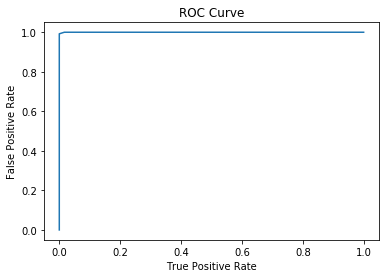

Training set areaUnderROC: 0.9999352561419005


In [150]:
import matplotlib.pyplot as plt
import numpy as np
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [151]:
predictions = lrModel.transform(test)
print(predictions)

DataFrame[state: int, balance: int, fraudRisk: int, features: vector, rawPrediction: vector, probability: vector, prediction: double]
